In [1]:
from manim import *
import math

Manim Community v0.17.3

## Plotting Curves

You can make an arbitrary path of line segments by calling the appropriate method of a generic `VMObject` instance.

Note that below we show two ways:
  1. `set_points_as_corners()` to make straight line segments
  1. `set_points_smoothly()` to make a smoother curve
  
  Note that you can also use `adds_points_as_corners()` to iteratively build a curve (eg. in an `updater` to make a complex path!)

In [12]:
%%manim -v WARNING -qm PlotCurves

class PlotCurves(Scene):
    def construct(self):
        # initial empty object
        curve = VMobject()
        self.add(curve)
        self.wait()
        
        curve.set_points_as_corners([UP, DOWN, LEFT, RIGHT]) # left open
        self.wait()
        
        curve.set_points_as_corners([UP*2, DOWN*2, LEFT*2, RIGHT*2, UP*2]) # closed (replaces old curve)
        self.wait()
        
        curve.set_points_as_corners(Circle().points) # more points = looks smoother (but close-up is jagged)
        self.wait()
        
        curve.set_points_smoothly(Circle().points) # more points = looks smoother (but close-up is jagged)
        self.wait()

## Animating Curve Plotting

In [2]:
%%manim -v WARNING -qm PlotCurves2

class PlotCurves2(Scene):
    def construct(self):
        curve = VMobject()
        
        points = Circle().points
        curve.set_points_as_corners(points)  # not added to scene yet
        
        self.play(Create(curve), run_time=3, rate_func=linear)  # animate the drawing of the circle

## Curve Following

Use an `updater` to update an object on each frame to follow the drawing of the curve.

`get_end()` tells you the end of the curve drawn so far.

Note that landmarks like `get_end()`, `get_center()`, etc. work for all objects, not just custom curves being animated.

In [14]:
%%manim -v WARNING -qm PlotCurves3

class PlotCurves3(Scene):
    def construct(self):
        curve = VMobject()
        
        points = Circle().points
        curve.set_points_as_corners(points)  # not added to scene yet
        
        # all the dot stuff here
        def dot_updater(old_dot):
            old_dot.move_to(curve.get_end())
        dot = Dot(radius=0.2)
        dot.add_updater(dot_updater)
        self.add(dot)
        
        self.play(Create(curve), run_time=3, rate_func=linear)  # animate the drawing of the circle

## Curve Styling

Use `stroke` and `stroke_size`

## Tracing Tails

There is a `TracedPath` object that does almost what 3blue1brown's `TracingTails` does in a video, but not as well.  For instance, I saw it get desynced from the dots following a curve.  It also seems to only support drawing __straight segments__ instead of smooth curves.

Since I don't anticipate using it much for the above reasons, I'm just quickly describing here with no example.  I may add an example later though.

The basic idea is you pass in a function (when is it called?  every frame?  maybe not - which would explain the weirdness) and some styling such as how long the trail takes to dissipate.  For instance, you could pass in `curve.get_end` as the function and use a tail following a curve rather than the curve itself visually.

## 2D Graph

There's a lot of __configuration__ you can do here, but the basic ID is you add the axes, and you add a plot that comes from the axes.

In [26]:
%%manim -v WARNING -qm Graph2D

class Graph2D(Scene):
    def construct(self):
        axes = Axes(x_range=[0, 10, 1], y_range=[0, 100, 10])
        self.add(axes)
        graph = axes.plot(lambda x: x**2, x_range=[0, 10])
        self.add(graph)
        self.wait()
        
        # animate drawing the graph just like any other shape
        self.remove(graph)
        self.play(Create(graph))
        
        # translating between real coords and graph coords
        points = axes.coords_to_point([2, 3], [4, 9])
        self.add(Dot().move_to(list(zip(*points))[0]))
        self.add(Dot().move_to(list(zip(*points))[1]))
        self.wait()

## 3D Graph

This is a __subclass__ of `Axes` and thus behaves similarly, but it behaves better by default.  It also interacts well with a `ThreeDScene`.

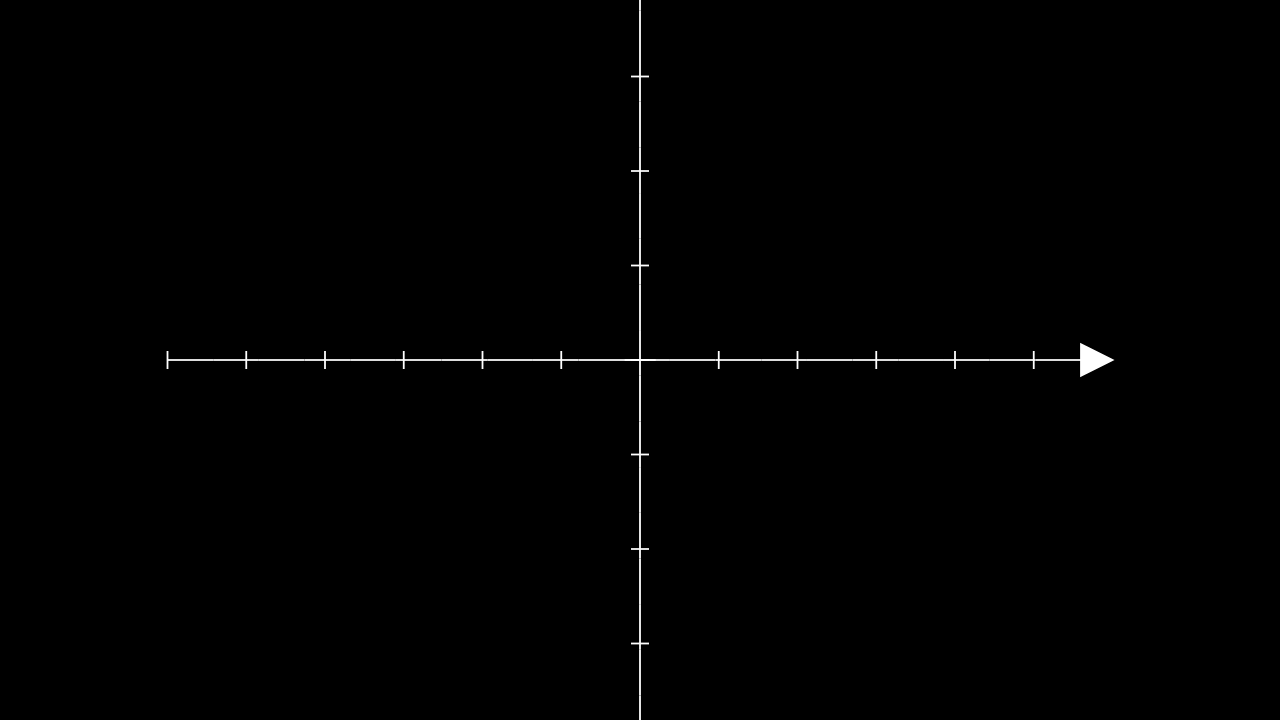

In [27]:
%%manim -v WARNING -qm Graph3D

class Graph3D(Scene):
    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)

## Axes Ranges

The range parametesr affect the following:

 * how many tick marks are made
 * how long the axes are drawn
 * how many values go into each tick mark
 
 NOTE: the ranges affect the transformation of `coords_to_point()`

In [7]:
%%manim -v WARNING -qm Graph3D2

class Graph3D2(Scene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=(-3, 4), # left-to-right by default
            y_range=(-1, 2), # down-to-up by default
            z_range=(0, 2),  # in-to-out by default
        )
        self.add(axes)
        self.wait()

## Axes Range Step

If provided, the __3rd member__ of each range is the __step__, which affects which tick marks are drawn.

The default is 1.

In [8]:
%%manim -v WARNING -qm Graph3D3

class Graph3D3(Scene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=(-4, 4, 2),
            y_range=(-1, 2),
            z_range=(0, 2),
        )
        self.add(axes)
        self.wait()

## Axes Lengths

The length params, if supplied, __scale the axes__ proportionally to fit a given constraint.  It affects the __length in the scene from end to end__ of that axis.

Note that in the example below, we have 3 equally sized axes with the same tick marks, but by making the lengths different, we made the y-axis look much more dense than the x-axis.

This affects the interpretation of where values go when transformed or plotted.

In [10]:
%%manim -v WARNING -qm Graph3D4

class Graph3D4(Scene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=(-10, 10),
            y_range=(-10, 10),
            z_range=(-10, 10),
            x_length=6,
            y_length=2,
        )
        self.add(axes)
        self.wait()

## Scaling the Axes Object Itself

Note that in the example below, changing the width of the axes object scaled __all the axes__ proportionally.

Thus, you can use the length params to set the proportionality and then explicitly set a specific axis to fit into a limit.

In [17]:
%%manim -v WARNING -qm Graph3D5

class Graph3D5(Scene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=(-10, 10),
            y_range=(-10, 10),
            z_range=(-10, 10),
            x_length=6,
            y_length=2,
        )
        axes.set(width=12)
        
        self.add(axes)
        self.wait()

## Axes Center

The centerpoint of the `Axes` object is actually the centerpoint of the 3 axes, rather than the origin, but it still defaults to its origin being at the center of the scene.

By calling `axes.center()`, you can put the centerpoint of the axes at the center of the scene.

In [69]:
%%manim -v WARNING -qm Graph3D5

class Graph3D5(ThreeDScene):
    def construct(self):
        axes = ThreeDAxes(
            x_range=(0, 10),
            y_range=(-10, 10),
            z_range=(0, 10),
        )
        axes.set(width=10)
        self.add(axes)
        self.set_camera_orientation(phi=math.radians(90))
        dot = Dot3D().move_to(axes.get_center())
        self.add(dot)
        
        self.wait()
        axes.center()
        dot.move_to(axes.get_center())
        self.wait()

## Number Plane

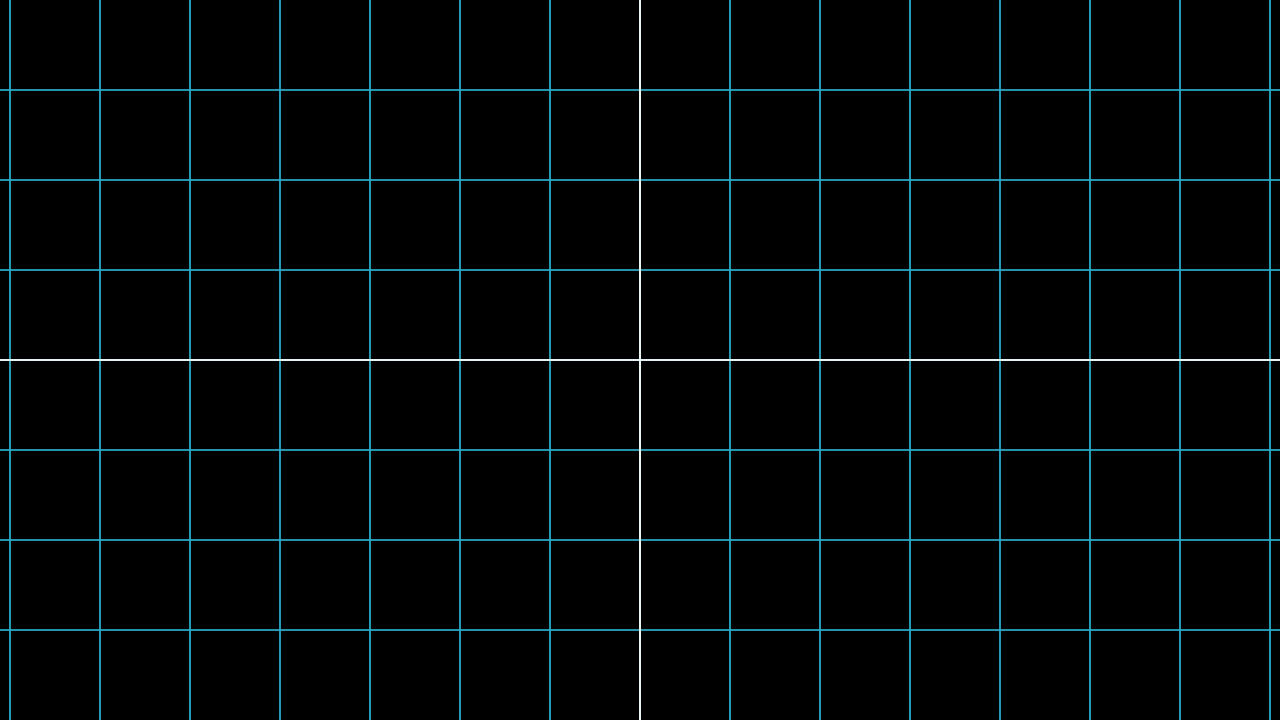

In [2]:
%%manim -v WARNING -qm NumberPlaneScene

class NumberPlaneScene(Scene):
    def construct(self):
        plane = NumberPlane()
        self.add(plane)

## coords_to_point()

It's worth noting that there are 2 ways to call `coords_to_point()` on `Axes`:
  1. with an array of points
  1. with 1-3 positional args telling the coordiantes of associated points
  
__HINT__: use `.T` of a matrix instead of zipping, etc. to make it clearer.

__NOTE__: don't forget about the inverse, `point_to_coords()`

In [11]:
%%manim -v WARNING -qm Graph2D

class Graph2D(Scene):
    def construct(self):
        axes = Axes(x_range=[0, 10, 1], y_range=[0, 100, 10])
        self.add(axes)
        graph = axes.plot(lambda x: x**2, x_range=[0, 10])
        self.add(graph)
        self.wait()
        
        # positional args way (blue dots)
        points = axes.coords_to_point([2, 3], [4, 9])  # given points are (2, 4) and (3, 9)
        self.add(Dot(color=BLUE).move_to(points.T[0])) # transpose
        self.add(Dot(color=BLUE).move_to(points.T[1]))
        self.wait()
        
        # 2D array way (red dots)
        points = axes.coords_to_point([[2, 4], [3, 9]])  # given points are (2, 4) and (3, 9)
        self.add(Dot(color=RED).move_to(points[0]))      # no transpose
        self.add(Dot(color=RED).move_to(points[1]))
        self.wait()